# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
################################# OBSERVABLE TREND ANALYSIS ###################################

#1.The Lower latitudes have higher temperatures and the higher latitudes have lower temperature. Temperature increases 
### as we approach the equator due to the Earth's tilt in the axis known as obliquity.

#2.Plots Cloudiness vs. latitude & humidity vs. latitude do not show a reliable correlation. The visualizations show 
## a great variety of values at similar latitudes.

#3.The highest wind speeds appear slightly increasing as we move farther away from the equator. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt
import pytz


# Import API key
from config import owm_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + owm_api_key

# Set & Start the API call iteration counter for FOR LOOP
counter = 1
api_calls = 51
sets=1

# Print log of each city as it's being processed (with the city number and city name).
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    if counter == api_calls:
        time.sleep(10)
        sets += 1#                                                               
                                            
        counter = 0  
        api_calls = 50
    # Try statement for exception handling
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} of Set {sets} | {city_record}")
        
        # Increase counter by one 
        counter= counter+ 1
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    except:
        print("City not found. Skipping...")
    continue
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Padang
Processing Record 2 of Set 1 | Sandnessjoen
Processing Record 3 of Set 1 | Port Alfred
Processing Record 4 of Set 1 | Quelimane
Processing Record 5 of Set 1 | Esperance
Processing Record 6 of Set 1 | Prince Rupert
Processing Record 7 of Set 1 | Punta Arenas
Processing Record 8 of Set 1 | Kruisfontein
Processing Record 9 of Set 1 | Gao
City not found. Skipping...
Processing Record 10 of Set 1 | Saint-Francois
Processing Record 11 of Set 1 | Thompson
Processing Record 12 of Set 1 | Albany
Processing Record 13 of Set 1 | Gdynia
Processing Record 14 of Set 1 | Nome
Processing Record 15 of Set 1 | Busselton
Processing Record 16 of Set 1 | Hobart
Processing Record 17 of Set 1 | Atuona
Processing Record 18 of Set 1 | Richards Bay
Processing Record 19 of Set 1 | Yumen
Processing Record 20 of Set 1 | Tianjin
Processing Record 21 of Set 1 | Ostrov
Processing Record 22 of Set 1 | Quthing
Processing Reco

Processing Record 36 of Set 4 | Bosaso
Processing Record 37 of Set 4 | Kpandae
Processing Record 38 of Set 4 | Nsanje
Processing Record 39 of Set 4 | Youkounkoun
Processing Record 40 of Set 4 | Tilichiki
Processing Record 41 of Set 4 | Broken Hill
Processing Record 42 of Set 4 | Castres
Processing Record 43 of Set 4 | Kindu
Processing Record 44 of Set 4 | Cervo
Processing Record 45 of Set 4 | Egvekinot
Processing Record 46 of Set 4 | Touros
City not found. Skipping...
Processing Record 47 of Set 4 | Batagay-Alyta
Processing Record 48 of Set 4 | Asifabad
Processing Record 49 of Set 4 | Namatanai
Processing Record 0 of Set 5 | Verkhniye Kigi
Processing Record 1 of Set 5 | Okha
Processing Record 2 of Set 5 | Arraial do Cabo
Processing Record 3 of Set 5 | Upernavik
Processing Record 4 of Set 5 | Acari
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 5 | Burgkirchen
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 5 | Ossor

Processing Record 20 of Set 8 | Poltavka
Processing Record 21 of Set 8 | Ceyhan
Processing Record 22 of Set 8 | Muros
Processing Record 23 of Set 8 | Poum
Processing Record 24 of Set 8 | Merrill
Processing Record 25 of Set 8 | Bambous Virieux
Processing Record 26 of Set 8 | North Myrtle Beach
Processing Record 27 of Set 8 | Bac Giang
Processing Record 28 of Set 8 | Tura
Processing Record 29 of Set 8 | Punto Fijo
Processing Record 30 of Set 8 | Lormont
City not found. Skipping...
Processing Record 31 of Set 8 | Naryan-Mar
Processing Record 32 of Set 8 | Fengxian
Processing Record 33 of Set 8 | Kirakira
Processing Record 34 of Set 8 | Kishanganj
City not found. Skipping...
Processing Record 35 of Set 8 | Teguise
Processing Record 36 of Set 8 | Vanimo
City not found. Skipping...
Processing Record 37 of Set 8 | Codrington
City not found. Skipping...
Processing Record 38 of Set 8 | Belyy Yar
Processing Record 39 of Set 8 | Port Hawkesbury
Processing Record 40 of Set 8 | Flinders
Processing 

Processing Record 5 of Set 12 | Caconda
Processing Record 6 of Set 12 | Agirish
Processing Record 7 of Set 12 | Kalispell
Processing Record 8 of Set 12 | Sulangan
Processing Record 9 of Set 12 | Auch
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame from the dictionary with the lists
weatherpy_data = pd.DataFrame({
    "City": city_name,
    "Cloudiness(%)":cloudiness, 
    "Country":country,
    "Date":date,
    "Humidity(%)":humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp(°F)": max_temp,
    "Wind Speed(mph)":wind_speed
})

# Display count of weather data values 
weatherpy_data.count()


City               560
Cloudiness(%)      560
Country            560
Date               560
Humidity(%)        560
Lat                560
Lng                560
Max Temp(°F)       560
Wind Speed(mph)    560
dtype: int64

In [6]:
# Save data frame to CSV
weatherpy_data.to_csv(output_data_file)

# Display data frame head 
weatherpy_data.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Max Temp(°F),Wind Speed(mph)
0,Padang,32,ID,1538282796,100,-0.92,100.36,79.46,5.41
1,Sandnessjoen,92,NO,1538281200,87,66.02,12.63,46.40,13.87
2,Port Alfred,0,ZA,1538282799,83,-33.59,26.89,65.78,20.51
3,Quelimane,40,MZ,1538280000,78,-17.88,36.89,78.80,10.29
4,Esperance,20,TT,1538280000,88,10.24,-61.45,78.80,6.53


In [8]:
# # For testing conversion of Unix UTC to Datetime
#weatherpy_data['Date'] = weatherpy_data['Date'].apply(lambda x:dt.fromtimestamp(x))  
#weatherpy_data['Date'].head()

In [9]:
# Formatting the dataframe Date column into a more readable format
weatherpy_data["City"]=weatherpy_data["City"]
weatherpy_data["Cloudiness(%)"]=weatherpy_data["Cloudiness(%)"]
weatherpy_data["Country"]=weatherpy_data["Country"]
weatherpy_data['Date'] = weatherpy_data['Date'].apply(lambda x:dt.fromtimestamp(x)) 
weatherpy_data["Humidity(%)"]=weatherpy_data["Humidity(%)"]
weatherpy_data["Lat"]=weatherpy_data["Lat"]
weatherpy_data["Lng"]=weatherpy_data["Lng"]
weatherpy_data["Max Temp(°F)"]=weatherpy_data["Max Temp(°F)"]
weatherpy_data["Wind Speed(mph)"]=weatherpy_data["Wind Speed(mph)"]
weatherpy_data.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Max Temp(°F),Wind Speed(mph)
0,Padang,32,ID,2018-09-29 21:46:36,100,-0.92,100.36,79.46,5.41
1,Sandnessjoen,92,NO,2018-09-29 21:20:00,87,66.02,12.63,46.40,13.87
2,Port Alfred,0,ZA,2018-09-29 21:46:39,83,-33.59,26.89,65.78,20.51
3,Quelimane,40,MZ,2018-09-29 21:00:00,78,-17.88,36.89,78.80,10.29
4,Esperance,20,TT,2018-09-29 21:00:00,88,10.24,-61.45,78.80,6.53


In [10]:
# Save formatted data frame to CSV
weatherpy_data.to_csv("output_data/cities_Date_format.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

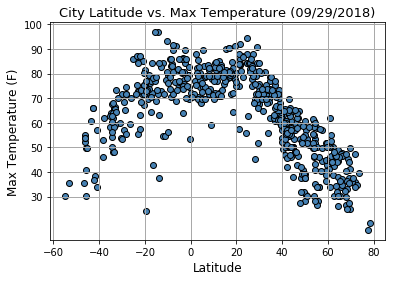

In [23]:
################################## Latitude vs. Temperature Plot ####################################################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Build a scatter plot 
plt.figure(figsize=(6,4))
plt.scatter(weatherpy_data["Lat"], weatherpy_data["Max Temp(°F)"], marker="o",facecolors="steelblue",edgecolors="black")

# Set other graph properties
plt.title("City Latitude vs. Max Temperature " +  str(Date),fontsize=13)
plt.ylabel("Max Temperature (F)",fontsize=12)
plt.xlabel("Latitude",fontsize=12)
plt.yticks(np.arange(30, 110, 10))
plt.xticks(np.arange(-60, 100, 20))
plt.grid(linestyle='-', linewidth='1.0', color='darkgrey')

# Save the figure
plt.savefig("Latitude vs. Temperature Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

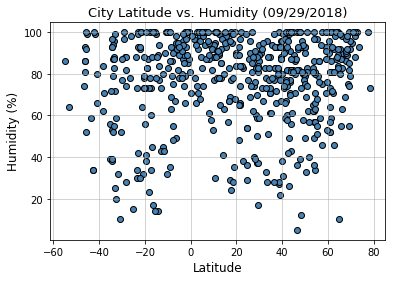

In [12]:
##################################### Latitude vs. Humidity Plot ###################################################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Build a scatter plot 
plt.figure(figsize=(6,4))
plt.scatter(weatherpy_data["Lat"], weatherpy_data["Humidity(%)"], marker="o",facecolors="steelblue",edgecolors="black")

# Setting other graph properties
plt.title("City Latitude vs. Humidity " +  str(Date),fontsize=13)
plt.ylabel("Humidity (%)",fontsize=12)
plt.xlabel("Latitude",fontsize=12)
plt.yticks(np.arange(20, 110, 20))
plt.xticks(np.arange(-60, 100, 20))
plt.grid(linestyle='-', linewidth='1.0', color='darkgrey')


# Save the figure
plt.savefig("Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

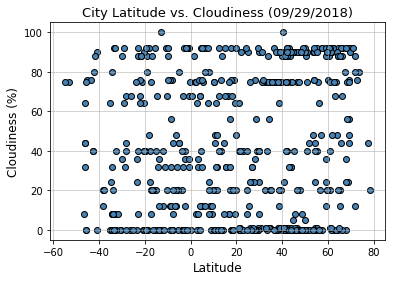

In [13]:
##################################### Latitude vs. Cloudiness Plot ###################################################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Build a scatter plot 
plt.figure(figsize=(6,4))
plt.scatter(weatherpy_data["Lat"], weatherpy_data["Cloudiness(%)"], marker="o",facecolors="steelblue",edgecolors="black")

# Setting other graph properties
plt.title("City Latitude vs. Cloudiness " +  str(Date),fontsize=13)
plt.ylabel("Cloudiness (%)",fontsize=12)
plt.xlabel("Latitude",fontsize=12)
plt.yticks(np.arange(0, 110, 20))
plt.xticks(np.arange(-60, 100, 20))
plt.grid(linestyle='-', linewidth='1.0', color='darkgrey')

# Save the figure
plt.savefig("Latitude vs. Cloudiness Plot.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

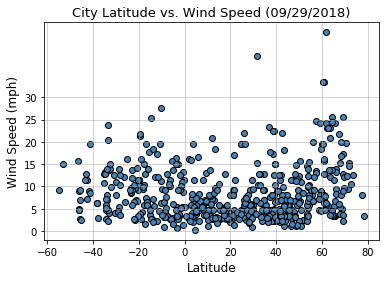

In [15]:
##################################### Latitude vs. Wind Speed Plot ###################################################

# Set Date format for the title
Date = dt.now().strftime("(%m/%d/%Y)")

# Build a scatter plot 
plt.figure(figsize=(6,4))
plt.scatter(weatherpy_data["Lat"], weatherpy_data["Wind Speed(mph)"], marker="o",facecolors="steelblue",edgecolors="black")

# Set other graph properties
plt.title("City Latitude vs. Wind Speed " +  str(Date),fontsize=13)
plt.ylabel("Wind Speed (mph)",fontsize=12)
plt.xlabel("Latitude",fontsize=12)
plt.yticks(np.arange(0, 35, 5))
plt.xticks(np.arange(-60, 100, 20))
plt.grid(linestyle='-', linewidth='1.0', color='darkgrey')

# Save the figure
plt.savefig("Latitude vs. Wind Speed Plot.png")

# Show plot
plt.show()